In [1]:
import math

import bs4
import matplotlib.pyplot as plt
import pandas as pd
import requests
import sqlalchemy as db
import seaborn as sns

# Uber Data Cleaning

In [2]:
uber_rides = pd.read_csv('uber_rides_sample.csv')
uber_rides = uber_rides.drop(['Unnamed: 0','key'], axis=1) #Remove unnecessary columns
uber_rides

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
uber_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [4]:
uber_rides = uber_rides.dropna(axis=0,how='any')

In [5]:
uber_rides.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Remove invalid data points

#### passenger_count 

In [6]:
#Unexpected max value in passenger_count:
passenger_outliers = uber_rides[uber_rides['passenger_count'] >= 7]
passenger_outliers

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00 UTC,-73.937795,40.758498,-73.937835,40.758415,208


In [7]:
#Remove the outliers for passenger_count:
uber_rides = uber_rides[uber_rides['passenger_count'] <= 7]

#### fare_amount 

C:\Users\89589\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

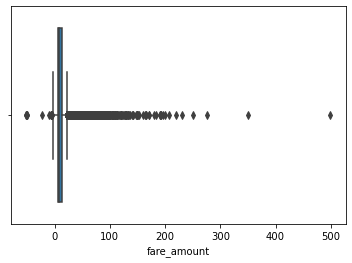

In [8]:
sns.boxplot(uber_rides['fare_amount'])

In [9]:
amount_outliers_too_low = uber_rides[uber_rides['fare_amount'] <= 0]
amount_outliers_too_low.fare_amount.count()

22

In [10]:
amount_outliers_too_high = uber_rides[uber_rides['fare_amount'] >= 100]
amount_outliers_too_high.fare_amount.count()

90

In [11]:
#Remove the outliers for fare_amount:
uber_rides = uber_rides[uber_rides['fare_amount'] <= 100]
uber_rides = uber_rides[uber_rides['fare_amount'] >= 0]

#### pickup_longitude/dropoff_longitude/pickup_latitude/dropoff_latitude

In [12]:
#Remove the cancel order for uber_rides:
uber_rides = uber_rides[uber_rides['pickup_longitude'] != 0]
uber_rides = uber_rides[uber_rides['pickup_latitude'] != 0]
uber_rides = uber_rides[uber_rides['dropoff_longitude'] != 0]
uber_rides = uber_rides[uber_rides['dropoff_latitude'] != 0]

In [15]:
uber_rides = uber_rides[uber_rides['pickup_longitude'] <= -73.717047]
uber_rides = uber_rides[uber_rides['pickup_longitude'] >= -74.242330]
uber_rides = uber_rides[uber_rides['dropoff_longitude'] <= -73.717047]
uber_rides = uber_rides[uber_rides['dropoff_longitude'] >= -74.242330]
uber_rides = uber_rides[uber_rides['pickup_latitude'] <= 40.908524]
uber_rides = uber_rides[uber_rides['pickup_latitude'] >= 40.560445]
uber_rides = uber_rides[uber_rides['dropoff_latitude'] <= 40.908524]
uber_rides = uber_rides[uber_rides['dropoff_latitude'] >= 40.560445]
uber_rides

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [16]:
uber_rides.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,195425.000000,195425.000000,195425.000000,195425.000000,195425.000000,195425.000000
mean,11.266033,-73.975547,40.750800,-73.974612,40.751058,1.683899
std,9.321915,0.034343,0.026873,0.033842,0.030587,1.307271
min,0.000000,-74.225452,40.565528,-74.237280,40.561228,0.000000
25%,6.000000,-73.992278,40.736473,-73.991597,40.735353,1.000000
50%,8.500000,-73.982122,40.753304,-73.980558,40.753737,1.000000
75%,12.500000,-73.968420,40.767513,-73.965483,40.768304,2.000000
max,100.000000,-73.720520,40.908310,-73.717899,40.907857,6.000000
